In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as px #data Visualisation

from google.colab import files
uploaded = files.upload()

import io

Saving movies.csv to movies (9).csv


# **DATA UNDERSTANDING**

**Read the data from CSV and print the sample data using head()**

In [29]:
movies_data = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
movies_data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


**Load the dataset to the dataFrame and get info about data such as count and data type used. Here the count gives the idea about missing values**

In [30]:
df = pd.DataFrame(movies_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [31]:
df.shape

(9999, 9)

**Get the details about missing data using isna() {isna() provides boolean values for each cell where data miss is false} isna().sum() gives the false total**

In [32]:
df.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

# DATA CLEANING

**Remove duplicate entries in the dataset**

In [33]:
df.drop_duplicates(subset ="MOVIES",keep = False, inplace = True)
df.shape

(6398, 9)

**Remove all the formattings from the data**

In [34]:
for col in ['GENRE','ONE-LINE','STARS']:
    df[col] = df[col].str.replace("\n","").str.strip()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN,NaN


**Format year so that we can differencate between movie and series**

In [35]:
df['Year'] = df['YEAR'].str.extract(r'([0-9]{4}–.*|[0-9]{4})')
df['Year'] = df['Year'].str.strip().replace(")","")

def extract_year(year):
    if year[-3:] == '– )':
        return year.replace('– )',"–")
    else:
        return year.replace(')',"")

df['Year'] = df['Year'].fillna('Unknown')
df['Year'] = df['Year'].apply(lambda y: extract_year(y))
    
year_count = df[df['Year'] != 'Unknown']['Year'].value_counts().reset_index().rename(columns = {'Year':'Count','index':'Year'})
year_count.head()
df = df.drop(['YEAR'], axis = 1)

**Remove duplicates from movie column**

In [36]:
df.drop_duplicates(subset=['MOVIES']).shape

(6398, 9)

**Add new feature by spliting the existing STARS column**

In [37]:
def extract_director(direc):
    if 'Director' in direc or 'Directors' in direc:
        director = direc.strip().split("|")[0] 
        return director.split(":")[1]
    else:
        return ''

def extract_stars(stars):
    if 'Star' not in stars or 'Stars' not in stars:
        return ''
    else:
        return stars.split(":")[-1]

df['Director'] = df['STARS'].apply(lambda d: extract_director(d))
df['Stars'] = df['STARS'].apply(lambda s: extract_stars(s))

df[['STARS','Director','Stars']].head()

,STARS,Director,Stars
0,Director:Peter Thorwarth| Stars:Peri Baume...,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,"Stars:Justin Roiland, Chris Parnell, Spencer G...",,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Director:Matthias Schweighöfer| Stars:Matt...,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [38]:
df.head(20)

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Director,Stars
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN,2021,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN,2021–,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN,2010–2022,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,NaN,2013–,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN,NaN,2021,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
5,Outer Banks,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cline, Madison Bai...","25,858",50.0,NaN,2020–,,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."
6,The Last Letter from Your Lover,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,Director:Augustine Frizzell| Stars:Shailen...,"5,283",110.0,NaN,2021,Augustine Frizzell,"Shailene Woodley, Joe Alwyn, Wendy Nottingham,..."
7,Dexter,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","Stars:Michael C. Hall, Jennifer Carpenter, Dav...","665,387",53.0,NaN,2006–2013,,"Michael C. Hall, Jennifer Carpenter, David Zay..."
8,Never Have I Ever,Comedy,7.9,The complicated life of a modern-day first gen...,"Stars:Maitreyi Ramakrishnan, Poorna Jagannatha...","34,530",30.0,NaN,2020–,,"Maitreyi Ramakrishnan, Poorna Jagannathan, Dar..."
9,Virgin River,"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...","Stars:Alexandra Breckenridge, Martin Henderson...","27,279",44.0,NaN,2019–,,"Alexandra Breckenridge, Martin Henderson, Coli..."


**Sort the dataset as per Year**

In [39]:
df.sort_values(by=['Year'])

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Director,Stars
1352,Scarface,"Action, Crime, Drama",7.8,An ambitious and nearly insane violent gangste...,"Directors:Howard Hawks, Richard Rosson| St...","26,365",93.0,NaN,1932,"Howard Hawks, Richard Rosson","Paul Muni, Ann Dvorak, Karen Morley, Osgood Pe..."
5213,Söderkåkar,Comedy,5.3,The movie version of Gideon Wahlbergs comedy a...,Director:Weyler Hildebrand| Stars:Gideon W...,59,87.0,NaN,1932,Weyler Hildebrand,"Gideon Wahlberg, Dagmar Ebbesen, Björn Berglun..."
5915,Kära släkten,Comedy,5.4,The story about a Stockholm wholesaler and his...,Director:Gustaf Molander| Stars:Gösta Ekma...,36,94.0,NaN,1933,Gustaf Molander,"Gösta Ekman, Tutta Rolf, Carl Barcklind, Thor ..."
6089,Karriär,Drama,5.2,A traveling theater company in Sweden. Conflic...,Director:Schamyl Bauman| Stars:Signe Hasso...,52,106.0,NaN,1938,Schamyl Bauman,"Signe Hasso, Sture Lagerwall, Tollie Zellman, ..."
1373,Dumbo,"Animation, Adventure, Drama",7.2,"Ridiculed because of his enormous ears, a youn...","Directors:Samuel Armstrong, Norman Ferguson, W...","124,409",64.0,$1.60M,1941,"Samuel Armstrong, Norman Ferguson, Wilfred Jac...","Sterling Holloway, Edward Brophy, Herman Bing,..."
...,...,...,...,...,...,...,...,...,...,...,...
5825,The Outlaw Ocean,"Action, Adventure, Crime",NaN,A vigilante crew hunts down illegal poachers a...,,NaN,NaN,NaN,Unknown,,
3338,Magic: The Gathering,"Animation, Action, Adventure",NaN,"Series focusing on the Planeswalkers, Magic's ...",,NaN,NaN,NaN,Unknown,,
5828,Pokémon,"Action, Adventure, Comedy",NaN,Plot under wraps. Adaptation of the Anime series.,,NaN,NaN,NaN,Unknown,,
3440,Blue Eye Samurai,"Animation, Action, Adventure",NaN,A mixed-race master of the sword named Erskine...,"Stars:Darren Barnet, Christine Ko, Brenda Song...",NaN,NaN,NaN,Unknown,,"Darren Barnet, Christine Ko, Brenda Song, Maya..."


# DATA VISUALIZATION

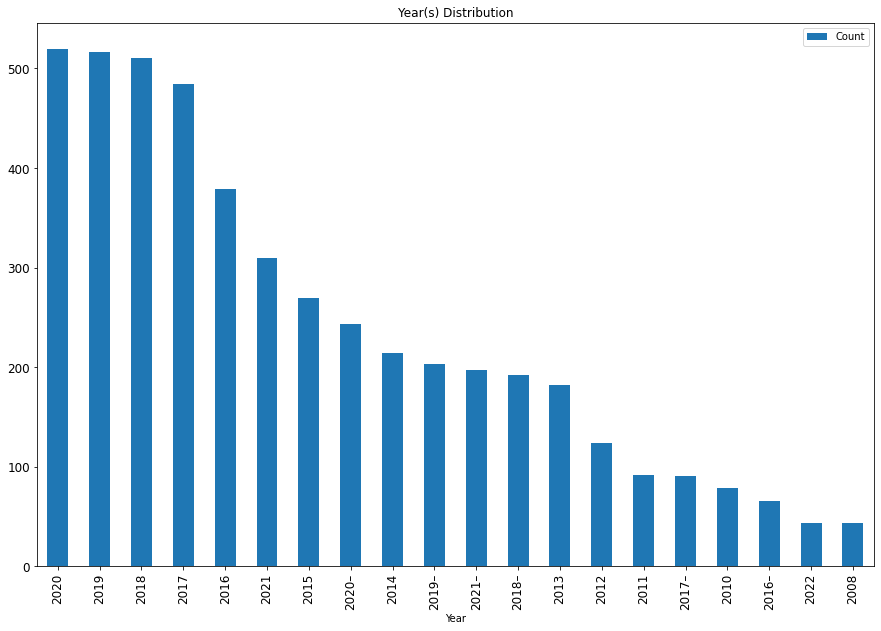

In [60]:
df_year=year_count.head(20)
df_year.plot(kind='bar', x='Year', y='Count', title ="Year(s) Distribution", figsize=(15, 10), legend=True, fontsize=12)
px.show()

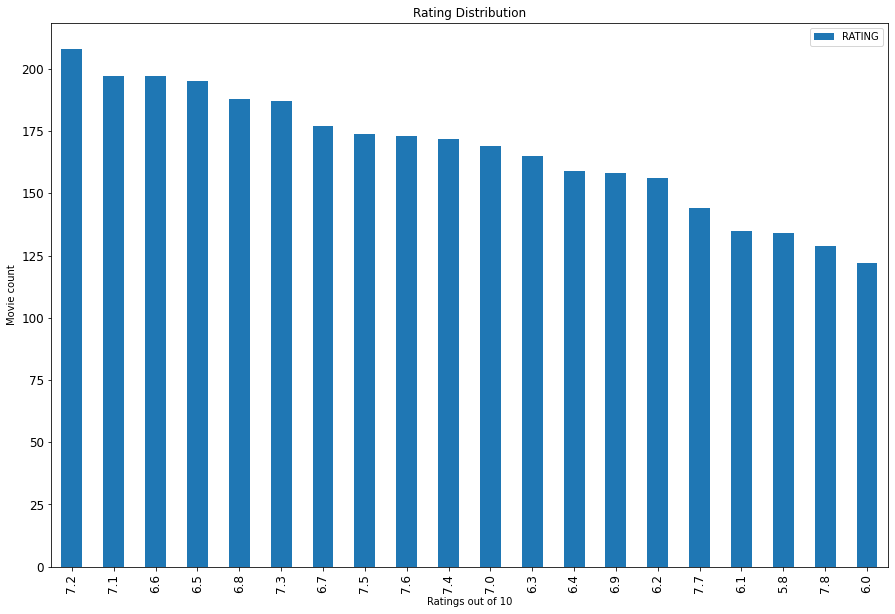

In [61]:
df_rating = df['RATING'].value_counts().reset_index().head(20)
fig = df_rating.plot(kind='bar', x = 'index', y = 'RATING', title ="Rating Distribution", figsize=(15, 10), legend=True, fontsize=12)
px.xlabel('Ratings out of 10')
px.ylabel('Movie count')
px.show()

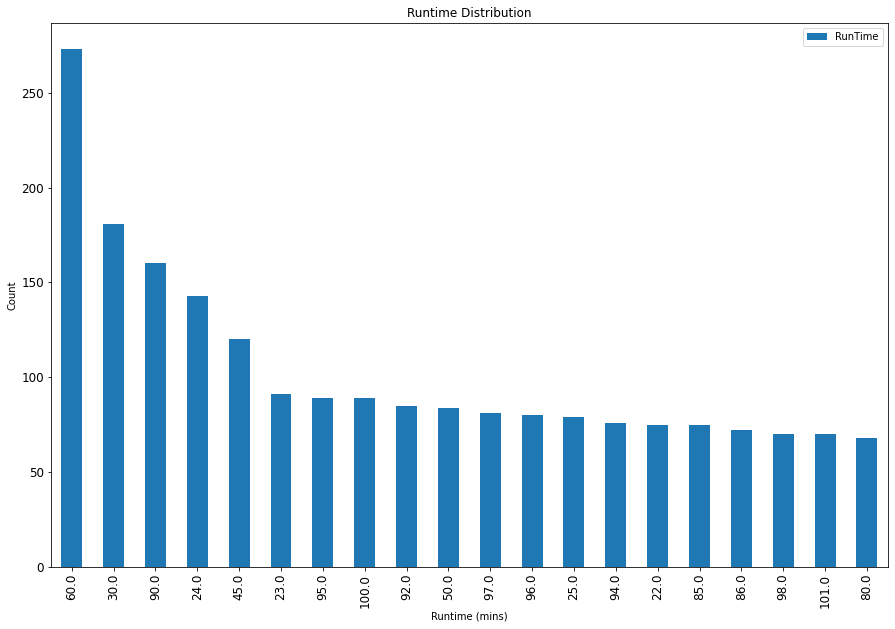

In [59]:
fig = data_frame = df['RunTime'].value_counts().reset_index().head(20).plot(kind='bar',x = 'index', y = 'RunTime', title = 'Runtime Distribution', figsize=(15, 10), legend=True, fontsize=12)
px.ylabel('Count')
px.xlabel('Runtime (mins)')

px.show()

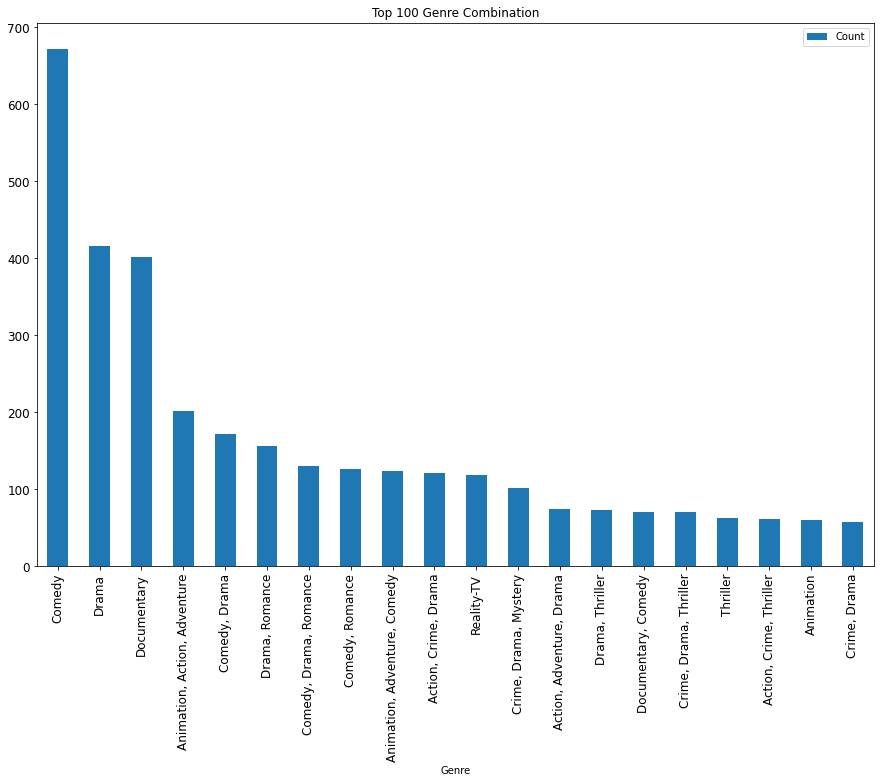

In [62]:
movie_genre = df['GENRE'].value_counts().reset_index().rename(columns={'GENRE':'Count','index':'Genre'})
movie_genre.sort_values(by='Count',ascending = False).head(20).plot(kind = 'bar' ,x = 'Genre', y = 'Count', title = 'Top 100 Genre Combination', figsize=(15, 10), legend=True, fontsize=12)

px.show()

In [17]:
from collections import Counter

genre_raw = df['GENRE'].dropna().to_list()
genre_list = list()

for genres in genre_raw:
    genres = genres.split(", ")
    for g in genres:
        genre_list.append(g)
        
genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient = 'index').rename(columns = {0:'Count'})
genre_df.head(5)

,Count
Action,1109
Horror,391
Thriller,615
Animation,855
Adventure,804


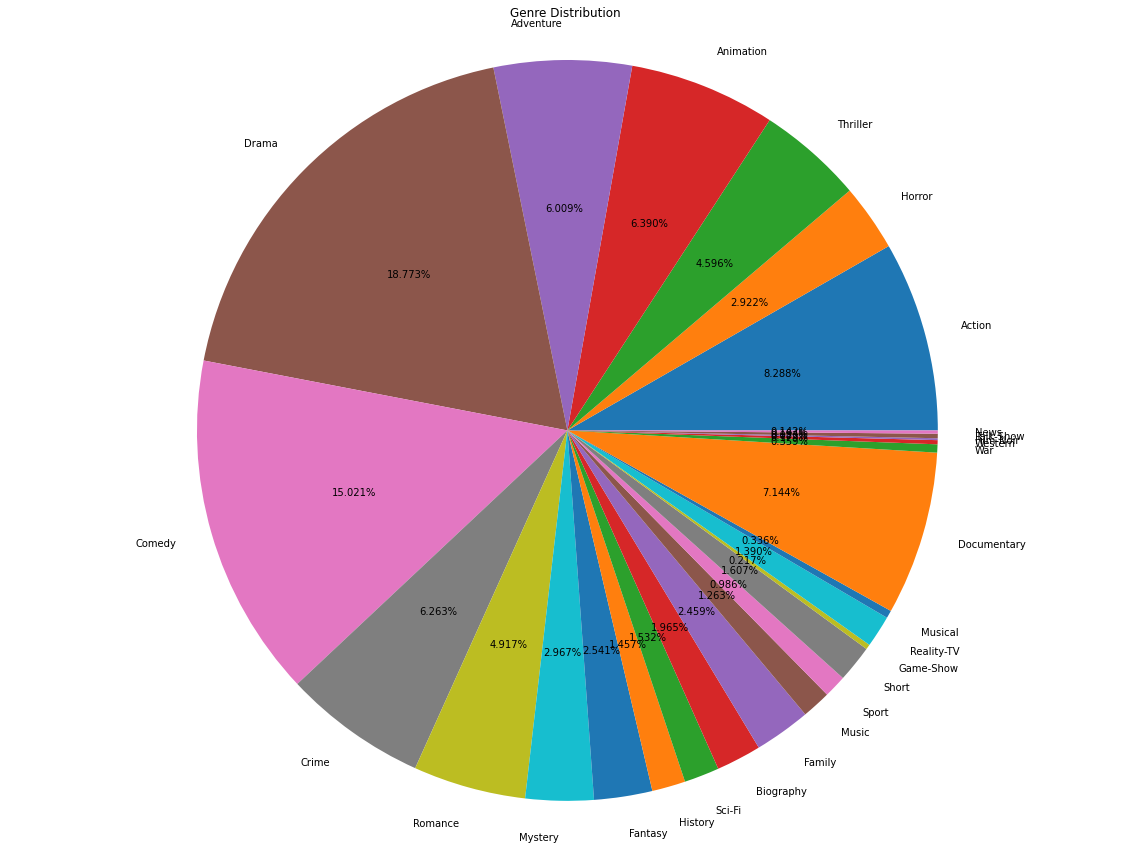

In [80]:
px.figure(figsize=(20,15))

px.pie(genre_df['Count'],labels=genre_df.index,autopct='%.3f%%')
px.title('Genre Distribution')
px.axis('equal')
px.show()

In [19]:
gross_df = df[~df['Gross'].isna()]
def extract_gross(gross):
    return float(gross.replace("$","").replace("M",""))

gross_df['Gross'] = gross_df['Gross'].apply(lambda g: extract_gross(g))

gross_df['Gross'].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



77      75.47
85     402.45
95      89.22
111    315.54
125     57.01
Name: Gross, dtype: float64

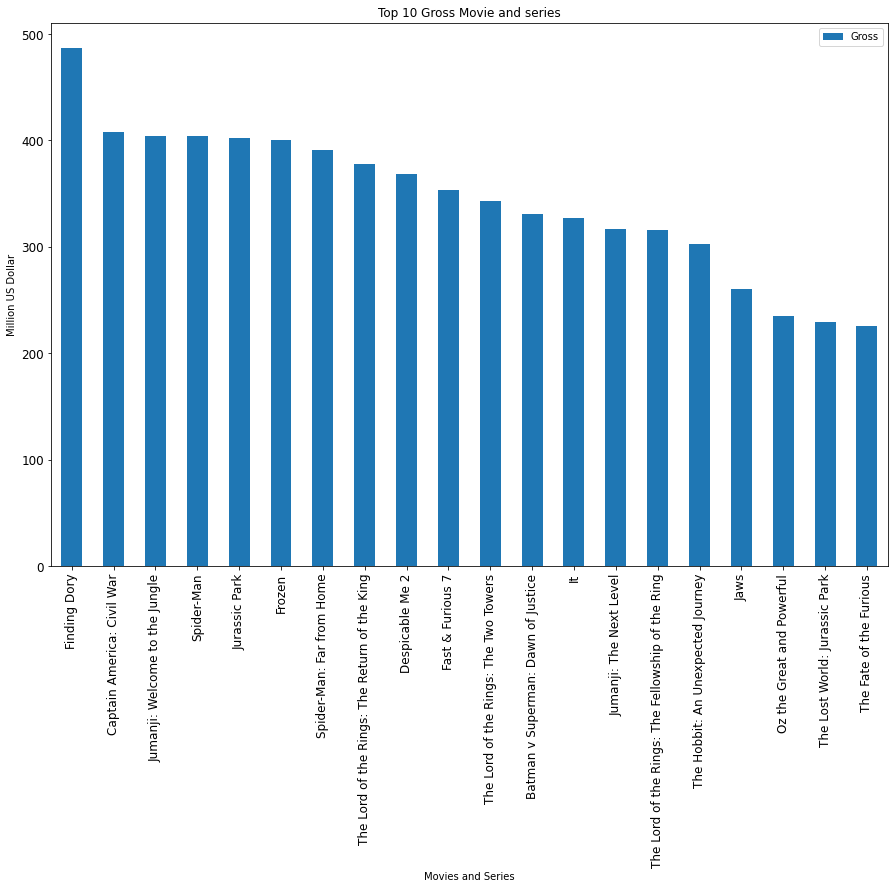

In [84]:
gross_df.sort_values(by='Gross', ascending = False).head(20).plot(kind = 'bar',
             x = 'MOVIES', y = 'Gross', title = 'Top 10 Gross Movie and series', figsize=(15, 10), legend=True, fontsize=12)
px.ylabel('Million US Dollar')
px.xlabel('Movies and Series')

px.show()

# RECOMMANDATION MODEL USING COSINE_SIMILARITY

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

features = ['GENRE','ONE-LINE','Director', 'Stars']

for feature in features:
    df[feature] = df[feature].fillna("")

df['combined_features'] = df['GENRE'] + " " + df['ONE-LINE']+ " " + df['Director']+ " " + df['Stars']

cv = CountVectorizer()

count_matrix = cv.fit_transform(df['combined_features'])

cosine_sim = cosine_similarity(count_matrix)

In [86]:
def movie_recommendation(mov,sim_num = 5):

    user_choice = mov
    
    try:
        ref_index = df[df['MOVIES'].str.contains(user_choice, case = False)].index[0]

        similar_movies = list(enumerate(cosine_sim[ref_index]))

        sorted_simmilar_movies = sorted(similar_movies, key = lambda x: x[1], reverse = True)[1:]

        print('\nRecomended Movies/Series for [{}]'.format(user_choice))
        print('-'*(24 + len(user_choice)))

        for i, element in enumerate(sorted_simmilar_movies):
            similar_movie_id = element[0]
            similar_movie_title = df['MOVIES'].iloc[similar_movie_id]
            s_score = element[1]
            print('{:40} -> {:.3f}'.format(similar_movie_title, s_score))
            
            if i > sim_num:
                break
    except IndexError:
        print("\n[{}] is not in our database!".format(user_choice))
        print("We couldn't recommend anyting...Sorry...")

In [92]:
movie_recommendation("The Fate of the Furious")


Recomended Movies/Series for [The Fate of the Furious]
-----------------------------------------------
Arcane                                   -> 0.392
He-Man and the Masters of the Universe   -> 0.385
Oni                                      -> 0.381
Star Trek                                -> 0.371
Bright: Samurai Soul                     -> 0.369
Spartacus: Blood and Sand                -> 0.369
Nanatsu no taizai                        -> 0.364
